# NLP Tutorial - Level 1

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.

# The data

- Import dataset
- Have a look at how it is structured


In [1]:
print("Here we import the packages we are going to need to do the analysis")
import pandas as pd
import nltk
import matplotlib.pyplot as plt

Here we import the packages we are going to need to do the analysis


In [2]:
df = pd.read_csv("dataset_sentiment/Tweets.csv")

a,b = df.shape
print("The dataframe has " + str(a) +" rows and " + str(b) + " columns.")
print("Each row is a tweet and each column is some information about the tweet \n")

columns = df.columns

print("The columns of the dataset are: \n")
for i,k in enumerate(columns): print(i+1, k)



The dataframe has 14640 rows and 15 columns.
Each row is a tweet and each column is some information about the tweet 

The columns of the dataset are: 

1 tweet_id
2 airline_sentiment
3 airline_sentiment_confidence
4 negativereason
5 negativereason_confidence
6 airline
7 airline_sentiment_gold
8 name
9 negativereason_gold
10 retweet_count
11 text
12 tweet_coord
13 tweet_created
14 tweet_location
15 user_timezone


### What's each column for? 

We can go to the page where we got the dataset from, and we will find a description of each column: https://www.kaggle.com/crowdflower/twitter-airline-sentiment

1. **tweet_id** The ID of the tweet
2. **airline_sentiment** The sentiment of the tweet
3. **airline_sentiment_confidence** Confidence assigned to the sentiment label i.e. how sure are we that the **airline_sentiment** that was assigned to the tweet is correct. This is a percentage. 
4. **negativereason** Reason why the tweet is negative 
5. **negativereason_confidence** How sure are we that the **negativereason** that was assigned to the tweet is correct. This is a percentage.
6. **airline** Airline the tweet is about
7. **airline_sentiment_gold** 
8. **name** Name of the twitter user 
9. **negativereason_gold**
10. **retweet_count** How many retweets did the tweet get 
11. **text** The text of the Tweet
12. **tweet_coord** Coordinates of the Tweet 
13. **tweet_created** Datetime when the Tweet was posted 
14. **tweet_location** Location of the Tweet
15. **user_timezone** Timezone of the Twitter user 


We could use *all* of these columns for analysis. However, for the sake of simplicity **we will only use the following columns:** 
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- airline
- text

In [3]:
print("We are going to delete all the columns except id, sentiment, airline and text...")

df.drop(df.columns.difference(['tweet_id', 'airline_sentiment', 'airline', 'text', 'airline_sentiment_confidence']), 1, inplace=True)

a,b = df.shape
print("The dataset now has " + str(a) +" rows and " + str(b) + " columns.")

We are going to delete all the columns except id, sentiment, airline and text...
The dataset now has 14640 rows and 5 columns.


In [102]:
print("Let's look at a couple of rows as an example: ")
df.head(3)

Let's look at a couple of rows as an example: 


,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,text
0,570306133677760513,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,negative,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...


For this analysis **we will also delete all the Tweets with a neutral sentiment**, since we are only interested in classifying tweets as good or bad.

Also, we will only keep those Tweets for whcih the sentiment confidence is very high, over a 0.7. We don't want labels that could be mistaken.

In [4]:
print("We delete all the rows with a neutral sentiment ")
df = df[df['airline_sentiment'] != "neutral"]

print("We delete all the rows with a sentiment confidence below 0.7 ")
df = df[df['airline_sentiment_confidence'] >= 0.7]


a,b = df.shape
print("The dataset now has " + str(a) +" rows and " + str(b) + " columns.")


We delete all the rows with a neutral sentiment 
We delete all the rows with a sentiment confidence below 0.7 
The dataset now has 9134 rows and 5 columns.


In [104]:
print("We print again the first couple of rows ")
df.head(5)

We print again the first couple of rows 


,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,text
3,570301031407624196,negative,1.0,Virgin America,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,1.0,Virgin America,@VirginAmerica and it's a really big bad thing...
5,570300767074181121,negative,1.0,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
9,570295459631263746,positive,1.0,Virgin America,"@VirginAmerica it was amazing, and arrived an ..."
11,570289724453216256,positive,1.0,Virgin America,@VirginAmerica I &lt;3 pretty graphics. so muc...


Cool! This is the final dataset we are going to be working with! Let's now get some general statistics...

Let's see how many Tweets we have for each sentiment tag


<AxesSubplot:>

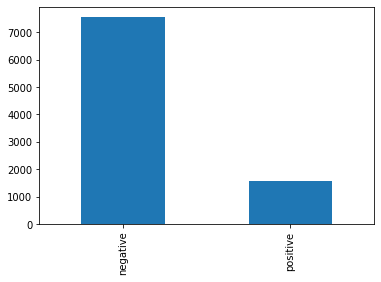

In [105]:
print("Let's see how many Tweets we have for each sentiment tag")

column_name = 'airline_sentiment'

df[column_name].value_counts().plot.bar()

Let's see how many Tweets we have for each airline


<AxesSubplot:>

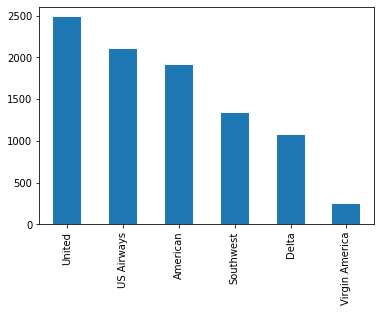

In [106]:
print("Let's see how many Tweets we have for each airline")

column_name = 'airline'

df[column_name].value_counts().plot.bar()

### What about the text?

In [107]:
n_tweets = len(df['text'])
print("There is a total of " + str(n_tweets) + " Tweets. Some examples are: \n\n")

for i,k in enumerate(df['text'][0:10]): print(i+1,  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

There is a total of 9134 Tweets. Some examples are: 


1 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse (negative)

2 @VirginAmerica and it's a really big bad thing about it (negative)

3 @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA (negative)

4 @VirginAmerica it was amazing, and arrived an hour early. You're too good to me. (positive)

5 @VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D (positive)

6 @VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p (positive)

7 @VirginAmerica Thanks! (positive)

8 @VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo (positive)

9 @VirginAmerica  I flew from NYC to SFO last

### Let's start the cleaning! 

We can start the cleaning by: 

- making everything lowercase
- removing # sign of hashtags 
- removing usernames 
- removing symbols 
- removing punctuation


In [108]:
import re
import string

tweets = df['text'].to_list()

def basic_cleaning(tweet):
    
    #This makes text lowercase
    tweet = tweet.lower()
    #This removes hashtag
    tweet = tweet.replace("#","")
    #This removes any word that starts with @ i.e. usernames 
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('(?:\s)&[^, ]*', '', tweet)
    
    return tweet
    
tweets = [basic_cleaning(tweet) for tweet in tweets]

for i,k in enumerate(tweets[0:10]): print(i+1,  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

1  it's really aggressive to blast obnoxious "entertainment" in your guests' faces they have little recourse (negative)

2  and it's a really big bad thing about it (negative)

3  seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying va (negative)

4  it was amazing, and arrived an hour early. you're too good to me. (positive)

5  i pretty graphics. so much better than minimal iconography. :d (positive)

6  this is such a great deal! already thinking about my 2nd trip to  i haven't even gone on my 1st trip yet! ;p (positive)

7  thanks! (positive)

8  so excited for my first cross country flight lax to mco i've heard nothing but great things about virgin america. 29daystogo (positive)

9   i flew from nyc to sfo last week and couldn't fully sit in my seat due to two large gentleman on either side of me. help! (negative)

10 i ❤️ flying  ☺️👍 (positive)



In [109]:
import emoji 

def handling_emojis(tweet):

    
    #Dealing with happy emojis
    tweet = tweet.replace(":d","good")
    tweet = tweet.replace(":)","good")
    tweet = tweet.replace(";d","good")
    tweet = tweet.replace(";)","good")
    tweet = tweet.replace(";p","good")
    tweet = tweet.replace(":p","good")
    
    #Dealing with sad emojis
    tweet = tweet.replace(":(","bad")
    tweet = tweet.replace(":/","bad")
    
    return tweet

tweets = [handling_emojis(tweet) for tweet in tweets]

for i,k in enumerate(tweets[0:10]): print(i+1,  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

1  it's really aggressive to blast obnoxious "entertainment" in your guests' faces they have little recourse (negative)

2  and it's a really big bad thing about it (negative)

3  seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying va (negative)

4  it was amazing, and arrived an hour early. you're too good to me. (positive)

5  i pretty graphics. so much better than minimal iconography. good (positive)

6  this is such a great deal! already thinking about my 2nd trip to  i haven't even gone on my 1st trip yet! good (positive)

7  thanks! (positive)

8  so excited for my first cross country flight lax to mco i've heard nothing but great things about virgin america. 29daystogo (positive)

9   i flew from nyc to sfo last week and couldn't fully sit in my seat due to two large gentleman on either side of me. help! (negative)

10 i ❤️ flying  ☺️👍 (positive)



In [110]:
def some_more_cleaning(tweet):
    
    for c in string.punctuation: 
        tweet = tweet.replace(c," ")
        
        
    #Deal with complex emojis
    tweet = emoji.demojize(tweet)
    
    return tweet

tweets = [some_more_cleaning(tweet) for tweet in tweets]

for i,k in enumerate(tweets[0:10]): print(i+1,  k, "(" + str(df['airline_sentiment'].to_list()[i]) + ")\n")

1  it s really aggressive to blast obnoxious  entertainment  in your guests  faces they have little recourse (negative)

2  and it s a really big bad thing about it (negative)

3  seriously would pay  30 a flight for seats that didn t have this playing 
it s really the only bad thing about flying va (negative)

4  it was amazing  and arrived an hour early  you re too good to me  (positive)

5  i pretty graphics  so much better than minimal iconography  good (positive)

6  this is such a great deal  already thinking about my 2nd trip to  i haven t even gone on my 1st trip yet  good (positive)

7  thanks  (positive)

8  so excited for my first cross country flight lax to mco i ve heard nothing but great things about virgin america  29daystogo (positive)

9   i flew from nyc to sfo last week and couldn t fully sit in my seat due to two large gentleman on either side of me  help  (negative)

10 i :red_heart_selector: flying  :smiling_face_selector::thumbs_up: (positive)

